<a href="https://colab.research.google.com/github/ElhamMahdian/DeepLearning_cifar10/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, GlobalMaxPooling2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [133]:
batch_size = 32
num_classes = 10
#epoch = 1600
data_augmentation = True

*Load Dataset*

In [134]:
(x_train, y_train), (x_test , y_test) = cifar10.load_data()
print("x_train.shape:" , x_train.shape)
print(x_train.shape[0] , 'train_samples')
print(x_test.shape[0] , 'test_samples')

x_train.shape: (50000, 32, 32, 3)
50000 train_samples
10000 test_samples


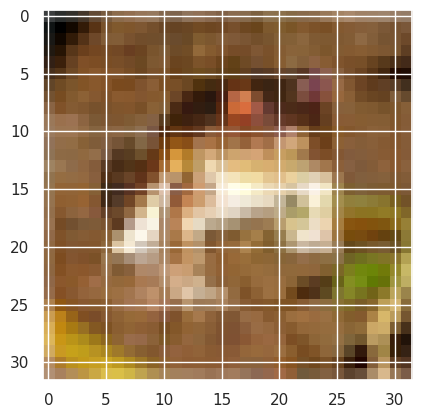

In [135]:
plt.imshow(x_train[0])

**Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255:**

In [136]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

***Transfer data to float***

In [137]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

***Normalize data based on pixels***

In [138]:
x_train/=255
x_test/=255

***Case1: relu , softmax , rmsprop , 50 epochs***

1.   List item
2.   List item



In [139]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_30 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_31 (Dropout)        (None, 16, 16, 64)      

In [140]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [141]:
m1 = model.fit(x_train , y_train , batch_size = batch_size , epochs = 50 , validation_data = (x_test , y_test))

Epoch 1/50
1563/1563 [==============================] - 22s 11ms/step - loss: 1.4896 - accuracy: 0.4677 - val_loss: 1.1911 - val_accuracy: 0.5863
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0581 - accuracy: 0.6287 - val_loss: 0.8944 - val_accuracy: 0.6877
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9214 - accuracy: 0.6793 - val_loss: 0.7345 - val_accuracy: 0.7405
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8266 - accuracy: 0.7140 - val_loss: 0.8310 - val_accuracy: 0.7063
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7721 - accuracy: 0.7326 - val_loss: 0.6838 - val_accuracy: 0.7575
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7269 - accuracy: 0.7506 - val_loss: 0.6474 - val_accuracy: 0.7753
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6833 - accuracy: 0.7620 - val_loss: 0.6457 - val

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns


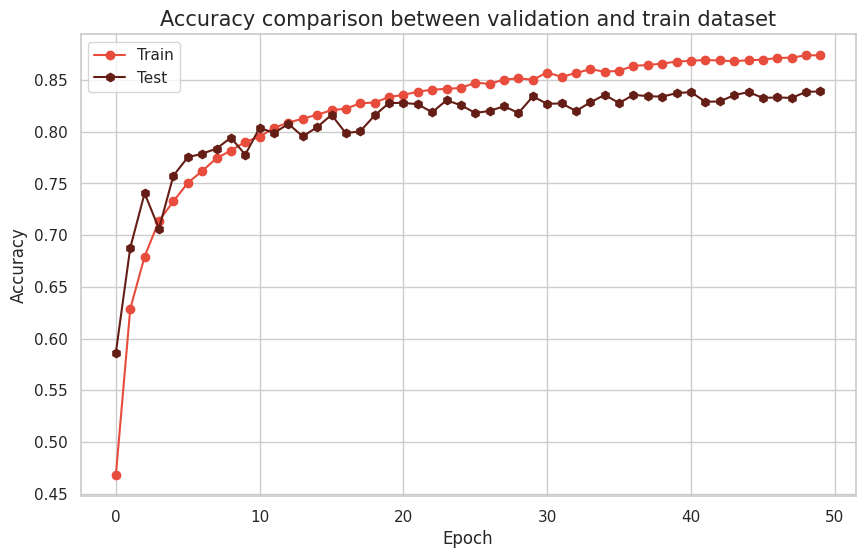

In [143]:
plt.figure(figsize = (10 , 6))
sns.set_style('whitegrid')
plt.plot(m1.history['accuracy'], color = '#E74C3C', marker = 'o')
plt.plot(m1.history['val_accuracy'], color = '#641E16', marker = 'h')
plt.title('Accuracy comparison between validation and train dataset', fontsize = 15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc ='best')
plt.show()

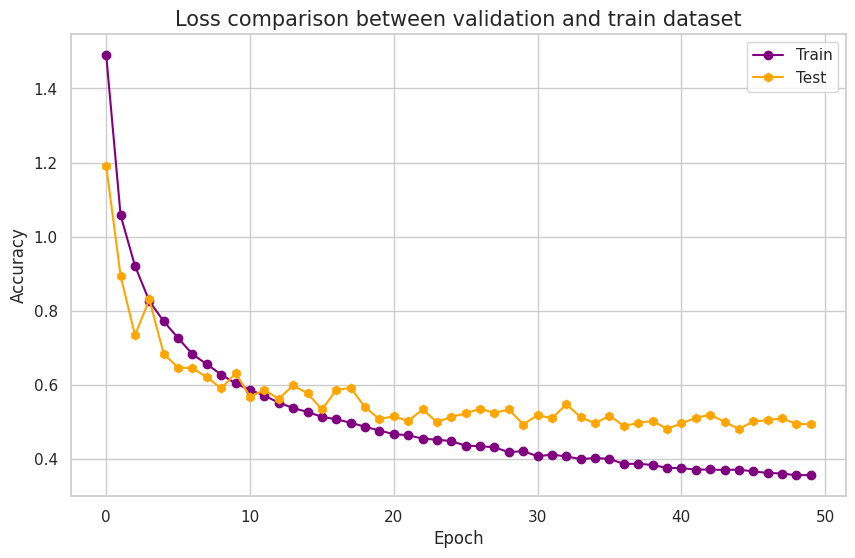

In [144]:
plt.figure(figsize = (10 , 6))
sns.set_style('whitegrid')
plt.plot(m1.history['loss'], color = 'Purple', marker = 'o')
plt.plot(m1.history['val_loss'], color = 'orange', marker = 'h')
plt.title('Loss comparison between validation and train dataset', fontsize = 15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc ='best')
plt.show()

In [145]:
for key,val in m1.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [146]:
import pandas as pd

<Axes: >

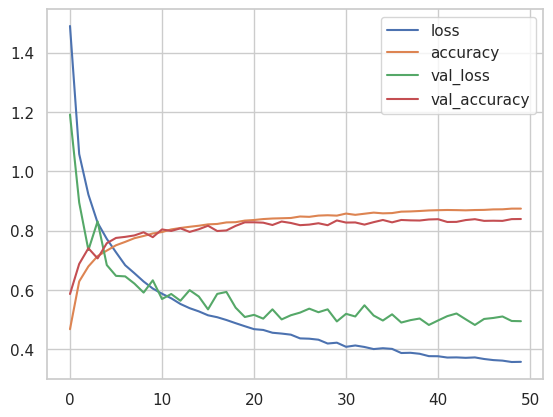

In [147]:
pd.DataFrame(m1.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

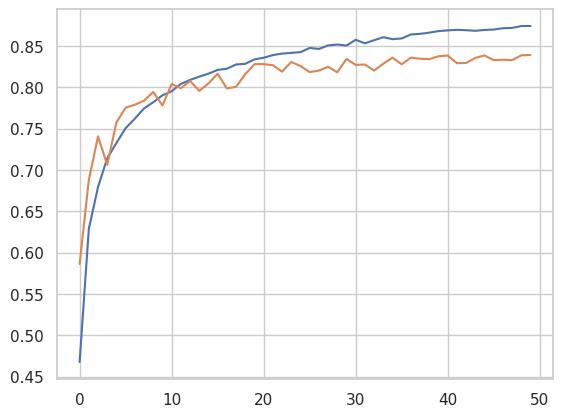

In [148]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.show

In [149]:
model.save('CNN_cifar10.h5')

In [150]:
model2 = load_model('CNN_cifar10.h5')

In [151]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [152]:
import numpy as np
import seaborn as sns; sns.set()

In [153]:
np.argmax(model2.predict(x_test[0:10])[0])

1/1 [==============================] - 0s 140ms/step


3

In [154]:
labels[3]

'cat'

In [159]:
predictions = model2.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [160]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

313/313 [==============================] - 1s 3ms/step


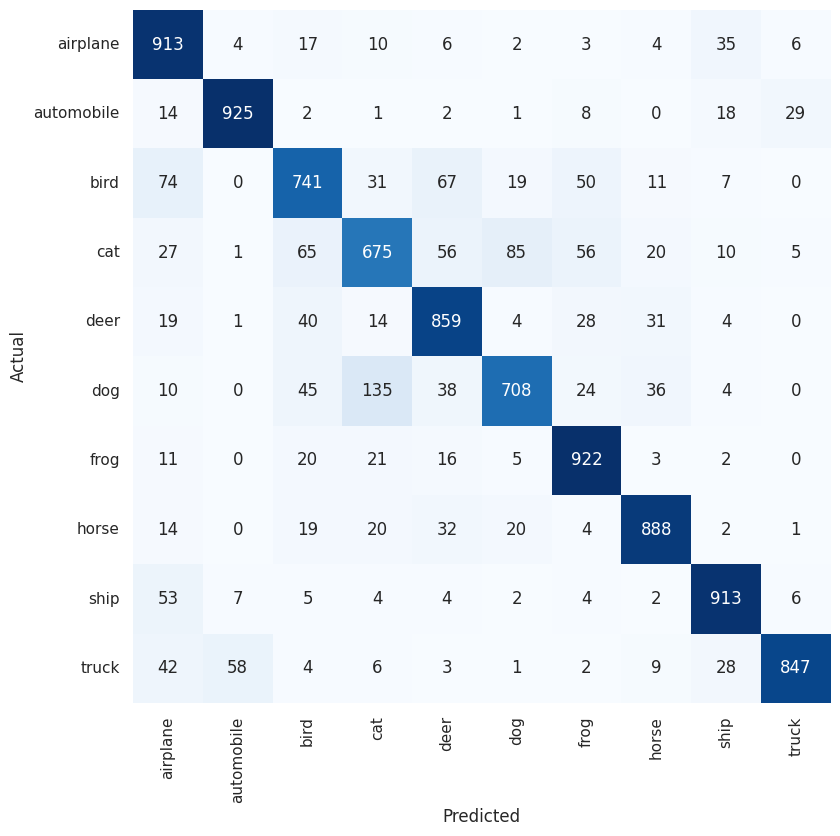

In [161]:
# Predicting test data
prediction = np.argmax(model.predict(x_test), axis=1)

y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

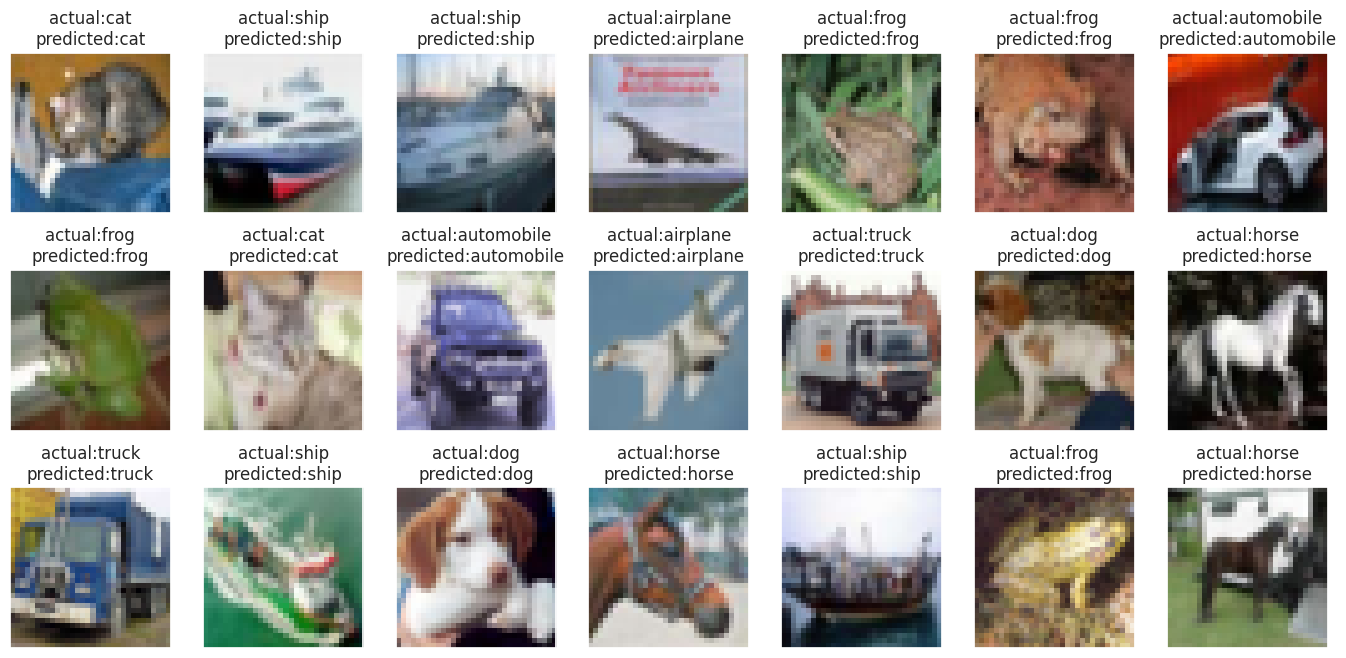

In [163]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()